# Section 6: Component Separated Maps

As part of DR4 we present component separated maps.  These maps cover about 2100 square degrees and have arcminute-resolution.  To produce these component separated maps we implemented an internal linear combination (ILC) algorithm.  

The ILC approach uses a linear co-addition of input maps in multiple frequencies to minimize variance of the final map while preserving the signal of interest.  It does so solely by relying on information about the frequency dependence of the various components.  Traditionally the ILC method doesn't explicitly remove any foregrounds, however, our approach works to explicitly null some of the foreground contamination.  However, it is important to note that since it is not possible to fully remove foreground contamination the auto-power spectrums of the resulting maps should be interpreted with significant caution.

Here we demonstrate how to read in and examine the Compton-$y$ and CMB+kSZ maps produced by this process.  In particular we note that it's possible to see galaxy clusters in the Compton-$y$ map by eye.  

Reference: [Madhavacheril et al. (2020)](https://www.overleaf.com/read/hnjnxpzgrrtp)
To return to the main notebook or to view a different section use the links in the table of contents.

## Table of contents

 --- 
> [Section 1](Section_1_Advanced_ACT_DR4_Combined_data_products.ipynb): Introduction and Importing Pixell, Healpy and other key packages

> [Section 2](Section_2_coadded_maps.ipynb): S08-18 Coadded maps and an Introduction to Pixell

> [Section 3](Section_3_HEALPix_CAR_Conversions.ipynb):  Demonstration of methods to converted maps between HEALPix format and the CAR format.

> [Section 4](Section_4_visualize_objects.ipynb):  Guide to using Pixell to look at objects in the maps and stacking our maps on catalogue positions.

> [Section 5](Section_5_Lensing_maps.ipynb):  Introduction to the Lensing maps.

> [Section 6](Section_6_Component_separated_maps.ipynb):  Guide to the use of the Component Separated maps.

> [Section 7](Section_7_harmonic_analysis.ipynb):  Harmonic Analysis with CAR Maps

> [Section 8](Section_8_E_B_maps.ipynb):  Looks at how to generate E and B maps from I, Q, U maps.  

---

## Initialize notebook

We begin by importing Pixell and other neccesary functions by running the introductory notebook.

We will also define a function eshow that plots CAR maps for us.  This function is introduced in the section 2 Notebook originally.



In [1]:
%run Section_1_Advanced_ACT_DR4_Combined_data_products.ipynb

def eshow(x,**kwargs): 
    ''' Define a function to help us plot the maps neatly '''
    plots = enplot.get_plots(x, **kwargs)
    enplot.show(plots, method = "ipython")

---
Table 4: Component Separated Maps
---
Map Type| File Name
---|---
CMB+kSZ maps| 
Map | tilec_single_tile_deep56_cmb{,_deprojects_comptony,_deprojects_cib}_map_v1.2.0_joint.fits 
Beam | tilec_single_tile_deep56_cmb{,_deprojects_comptony,_deprojects_cib}_map_v1.2.0_joint_beam.txt 
Noise | tilec_single_tile_deep56_cmb{,_deprojects_comptony,_deprojects_cib}_map_v1.2.0_joint_noise.fits
Cross-Noise |	tilec_single_tile_deep56_cmb{_deprojects_comptony,_deprojects_cib}_comptony_map_v1.2.0_joint_cross_noise.fits 
Weights | tilec_single_tile_deep56_cmb{,_deprojects_comptony,_deprojects_cib}_map_v1.2.0_joint_ARRAY_weight.fits 
| 
tSZ/Compton-Y maps| |
Map | tilec_single_tile_deep56_comptony{,_deprojects_cmb,_deprojects_cib}_map_v1.2.0_joint.fits 
Beam | tilec_single_tile_deep56_comptony{,_deprojects_cmb,_deprojects_cib}_map_v1.2.0_joint_beam.txt 
Noise | tilec_single_tile_deep56_comptony{,_deprojects_cmb,_deprojects_cib}_map_v1.2.0_joint_noise.fits 
Cross-Noise | tilec_single_tile_deep56_comptony{_deprojects_comptony,_deprojects_cib}_comptony_map_v1.2.0_joint_cross_noise.fits 
Weights | tilec_single_tile_deep56_comptony{,_deprojects_cmb,_deprojects_cib}_map_v1.2.0_joint_ARRAY_weight.fits 
|
Mask |tilec_mask.fits
 



These maps are named according to the Deep56 region.  To access the Boss region instead simply substitute 'boss' for 'deep56' in the names above.

Notice that the map, beam, noise and weights come in options that do not deproject anything, or that deproject another component. The former probably should be your baseline, and the latter should be used for systematics tests since they are noisier.

In the above, the most important products for your analysis are 'Map' and 'Beam'. 'Map' is a FITS file with a 2D array and a WCS header. 'Beam' is an ASCII file with two columns, the first corresponding to multipole number and the second corresponding to the effective beam transfer function in the map. 

'Noise' contains the 2D Fourier space total noise power spectrum from the ILC pipeline (this includes both signal and instrument noise). 'Cross-noise' is the total cross-power-spectrum of the standard map (no deprojection) with a particular choice of deprojection, as estimated by the ILC pipeline.

The 'Weights' FITS file contains the 2D Fourier space weight for each pixell corresponding to the array.

The 'mask' is an apodized mask with values ranging from 0 to 1. It has already been applied
to the map. All maps in a given directory use this same mask. If you are doing a real-space analysis,
you should exclude any pixels where the value in the mask is appreciably different from 1 since
the signal there should be attenuated by the value in the mask.

If you are doing a harmonic-space analysis, you should apply an overall correction to your
power spectrum of the form 1/mean(mask1 * mask2) (or equivalent for spherical harmonics).
(Note: Mode-coupling is probably unimportant for the Compton-Y map since the spectrum is not
very red. Mode-coupling can be important for the CMB map, but it's unlikely that you will
need to directly cross-correlate the CMB map in harmonic space. If you do, then
get in touch with us about how to handle the mode-coupling, since during reconstruction of
these maps, the mask was applied prior to a series of Fourier operations, and many 
power spectrum codes assume the mask has not yet been applied.)

In [2]:
# Here we demonstrate how to read in the deep 56 compton y map.  This is the same region 
# we looked at the lensing map for in the previous section

comptony = enmap.read_map(path + "tilec_single_tile_deep56_comptony_map_v1.2.0_joint.fits")

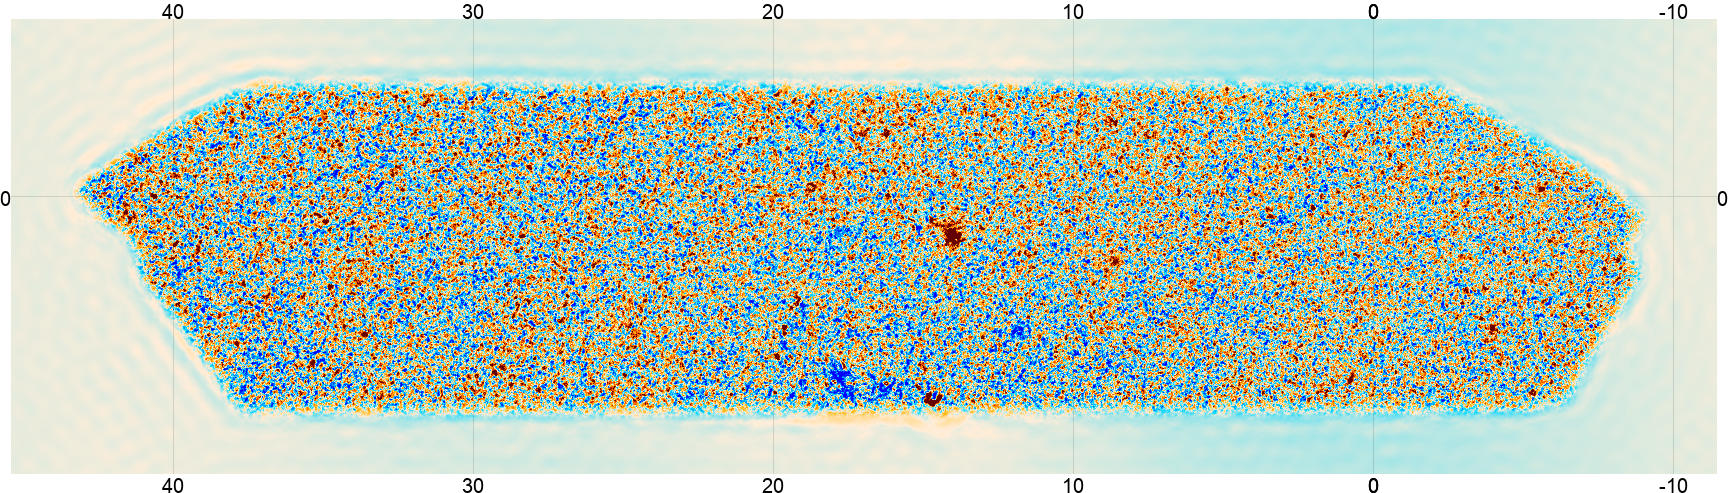

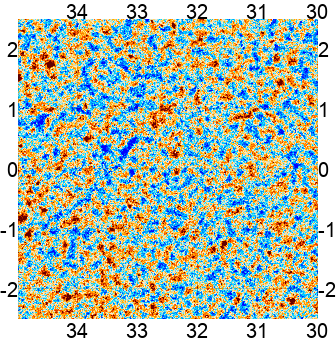

In [3]:
# We can plot the whole region - again adjust the 'downgrade' option to get a larger
# or smaller map
eshow(comptony, **{'downgrade': 4, 'ticks': 10})

# We can also look at a 'submap' using the 'sub' option in order to see more detail
eshow(comptony, **{"sub":"-2.5 :2.5 ,35:30", "downgrade": 2})

## Stacking on point sources

One of the interesting things to look at with component-separated maps is to look at the maps stacked at the locations of tSZ-clusters.  In particular we can compare the CMB+kSZ maps stacked at these locations to the CMB+kSZ maps with the tSZ effect deprojected. 

We can begin by reading in the relevant maps, in this case we want to consider the CMB+kSZ and the CMB+kSZ maps for the D56 region.  We will use the ACTPol + Planck maps in order to recreate stacks that are analogous to those shown in  figure 10 of [Madhavacheril et al. (2020)](https://www.overleaf.com/read/hnjnxpzgrrtp).


In [4]:
# Start by reading in the two relevant maps:
CMB_kSZ_D56 = enmap.read_map(path + "tilec_single_tile_deep56_cmb_map_v1.2.0_joint.fits")
CMB_kSZ_deproject_tsz_D56 = enmap.read_map(path + "tilec_single_tile_deep56_cmb_deprojects_comptony_map_v1.2.0_joint.fits")

Let's reuse our stacking code from earlier but apply the method to our two CMB+kSZ maps

In [5]:
from astropy.io import fits

hdu  = fits.open(path + 'E-D56Clusters.fits')
ras  = hdu[1].data['RADeg']
decs = hdu[1].data['DECDeg']
sn   = hdu[1].data["SNR"]

N = len(ras)
stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0

for i in range(N):
    # Extract stamps by reprojecting the map at the center of each source.
    # the 'postage_stamp' option here is designed to trim each reprojection so we
    # are left with a stack of point sources in a map of width 20 arc minutes
    
        
    stamp = reproject.postage_stamp(inmap = CMB_kSZ_D56 , ra_deg = ras[i], dec_deg = decs[i]\
                  , width_arcmin = 20., res_arcmin = .5)
    stamp_deproject = reproject.postage_stamp(inmap = CMB_kSZ_deproject_tsz_D56 \
                  , ra_deg = ras[i], dec_deg = decs[i], width_arcmin = 20., \
                  res_arcmin = .5)
    
    if stamp is None or stamp_deproject is None: continue 
    
        
    stack_CMB_kSZ += stamp[0]    
    stack_CMB_kSZ_deproject += stamp_deproject[0]
    c += 1
    
    
stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

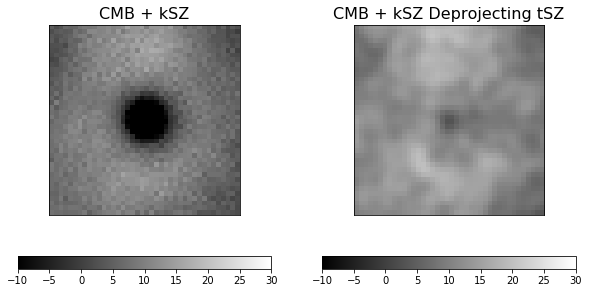

In [6]:
# Now we can plot both of these and compare

f, ax = plt.subplots(1,2, figsize=(10, 5))

f1 = ax[0].imshow(stack_CMB_kSZ, vmin = -10, vmax = 30, cmap = cm.gray)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("CMB + kSZ", fontsize = 16)
plt.colorbar(mappable = f1, ax = ax[0],orientation='horizontal')

f2 = ax[1].imshow(stack_CMB_kSZ_deproject, vmin = -10, vmax = 30, cmap = cm.gray)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("CMB + kSZ Deprojecting tSZ", fontsize = 16)
plt.colorbar(mappable = f2, ax = ax[1],orientation='horizontal')

plt.show()

As explained in [Madhavacheril et al. (2020)](https://www.overleaf.com/read/hnjnxpzgrrtp) the normal ILC procedure leaves behind large tSZ residuals as is evident in the left hand panel.  In comparison explicitly deprojecting the tSZ frequency massively reduces this residual.  

The slight difference we see between this and Madhavacheril et al. (2020) is due to the fact that we are using a publicly available catalog that contains much more massive clusters resulting in a slight, but visible, residual.

### Continue to the next section

[Section 7](Section_7_harmonic_analysis.ipynb):  Harmonic Analysis with CAR Maps